In [1]:
# Standard librariees
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame

#Statistics
from scipy import stats

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

Part 1.  Attached you can find the python notebook that we started to develop together in the classroom (there was a bug there and I've removed it, not it is so far correct). This is based on exercise 9.19 of your textbook, and we completed points (a) and (b). You need to do points: (d) and (f), as well as exercise 9.20 (continuation), points (a), (b), (c). You need to submit completed and fully commented python notebook, as well as scanned or typed file for point (a) of 9.20. 

In [2]:
# Libraries for time series analysis
import os
import sys

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.stattools as smtools
import scipy.stats as scs

C:\Users\Gariz\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_stata("homes.dta")

In [4]:
df.tail()

,homes,irate
214,362,4.88
215,353,4.93
216,338,5.03
217,324,4.99
218,411,4.97


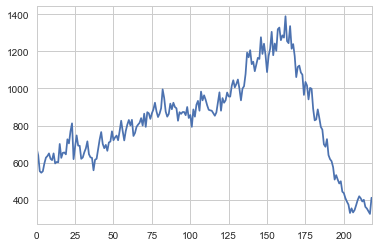

In [5]:
#there is trend in homes
df ["homes"].plot()
plt.show()

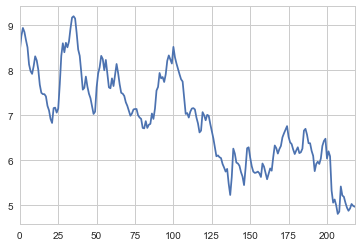

In [6]:
#trend in rate
df ["irate"].plot()
plt.show()

In [7]:
#Create data index
ts = pd.period_range(start = '1.1.1992',end = '3.1.2010', freq='M')
df['Date'] = ts
df.set_index('Date',inplace=True)

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
#homes is not stationary
result = adfuller(df['homes'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.227023
p-value: 0.904818
Critical Values:
	5%: -3.432
	1%: -4.003
	10%: -3.140


In [10]:
result = adfuller(df['irate'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.574027
p-value: 0.032112
Critical Values:
	5%: -3.431
	1%: -4.002
	10%: -3.139


In [11]:
df['dhomes'] = df['homes'].diff(periods=1)
df['dirate'] = df['irate'].diff(periods=1)
df.dropna(inplace=True)


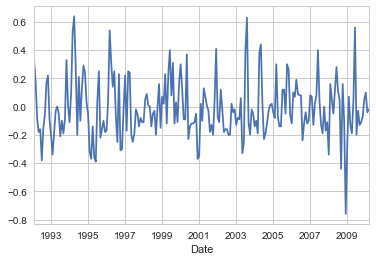

In [12]:
df ["dirate"].plot()
plt.show()


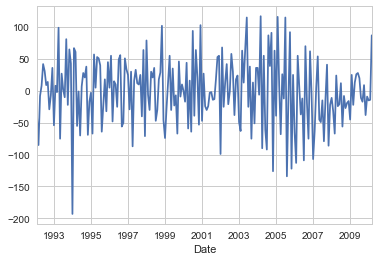

In [13]:
df ["dhomes"].plot()
plt.show()

In [14]:
result = adfuller(df['dirate'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.673954
p-value: 0.000000
Critical Values:
	5%: -3.431
	1%: -4.002
	10%: -3.139


In [15]:
result = adfuller(df['dhomes'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.425932
p-value: 0.000000
Critical Values:
	5%: -3.431
	1%: -4.002
	10%: -3.139


In [16]:
df['lag1_dhomes'] = df['dhomes'].shift(1)
df['lag1_dirate'] = df['dirate'].shift(1)
df['lag2_dirate'] = df['dirate'].shift(2)
df.dropna(inplace=True)

In [17]:
df.tail()

,homes,irate,dhomes,dirate,lag1_dhomes,lag1_dirate,lag2_dirate
Date,,,,,,,
2009-11,362,4.88,-38.0,-0.07,9.0,-0.11,-0.13
2009-12,353,4.93,-9.0,0.05,-38.0,-0.07,-0.11
2010-01,338,5.03,-15.0,0.10,-9.0,0.05,-0.07
2010-02,324,4.99,-14.0,-0.04,-15.0,0.10,0.05
2010-03,411,4.97,87.0,-0.02,-14.0,-0.04,0.10


In [18]:
X_multi=df.drop(['homes','irate','dhomes','dirate'], axis=1)
Y_target=df.dhomes
X_multi=sm.tools.tools.add_constant(X_multi, prepend=True, has_constant='skip')

In [19]:
mod = sm.OLS(Y_target, X_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 dhomes   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     12.40
Date:                Mon, 16 Apr 2018   Prob (F-statistic):           1.67e-07
Time:                        20:44:11   Log-Likelihood:                -1143.7
No. Observations:                 216   AIC:                             2295.
Df Residuals:                     212   BIC:                             2309.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.4912      3.333     -0.748      

In [20]:
# Dhomes = -2.49-0.33Dhomes(t-1)-50.78Dirate(t-1)-28.8Dirate(t-2)

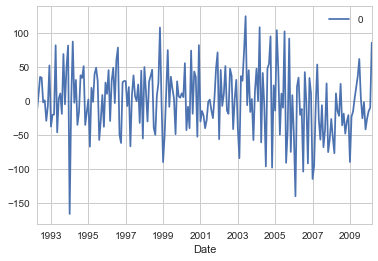

In [21]:
model_fit = mod.fit(disp=0)
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

d)

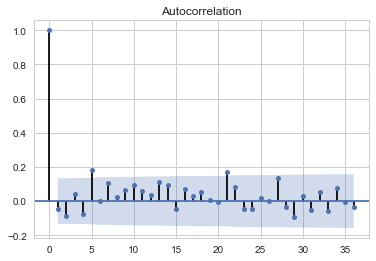

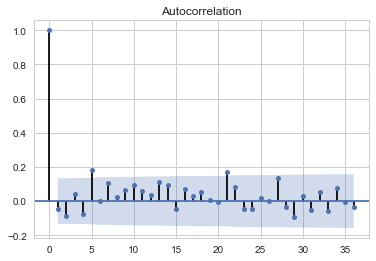

In [22]:
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals,lags=36)

In [23]:
#there are two significant  correlations at lags 5 and 21

f)

In [24]:
df['lag1_dhomes'] = df['dhomes'].shift(1)
df['lag5_dhomes'] = df['dhomes'].shift(5)
df['lag1_dirate'] = df['dirate'].shift(1)
df['lag3_dirate'] = df['dirate'].shift(3)
df.dropna(inplace=True)

In [25]:
df.tail()

,homes,irate,dhomes,dirate,lag1_dhomes,lag1_dirate,lag2_dirate,lag5_dhomes,lag3_dirate
Date,,,,,,,,,
2009-11,362,4.88,-38.0,-0.07,9.0,-0.11,-0.13,28.0,-0.03
2009-12,353,4.93,-9.0,0.05,-38.0,-0.07,-0.11,20.0,-0.13
2010-01,338,5.03,-15.0,0.10,-9.0,0.05,-0.07,-11.0,-0.11
2010-02,324,4.99,-14.0,-0.04,-15.0,0.10,0.05,-17.0,-0.07
2010-03,411,4.97,87.0,-0.02,-14.0,-0.04,0.10,9.0,0.05


In [26]:
X_multi=df.drop(['homes','irate','dhomes','dirate','lag2_dirate'], axis=1)
Y_target=df.dhomes
X_multi=sm.tools.tools.add_constant(X_multi, prepend=True, has_constant='skip')

In [27]:
mod = sm.OLS(Y_target, X_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 dhomes   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     13.19
Date:                Mon, 16 Apr 2018   Prob (F-statistic):           1.38e-09
Time:                        20:44:32   Log-Likelihood:                -1112.1
No. Observations:                 211   AIC:                             2234.
Df Residuals:                     206   BIC:                             2251.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.1238      3.306     -0.945      

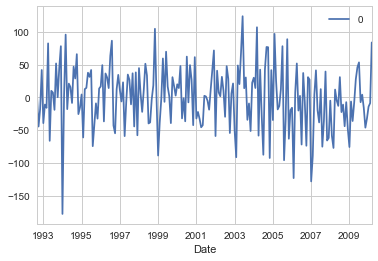

In [28]:
model2_fit = mod.fit(disp=0)
residuals = DataFrame(model2_fit.resid)
residuals.plot()
plt.show()

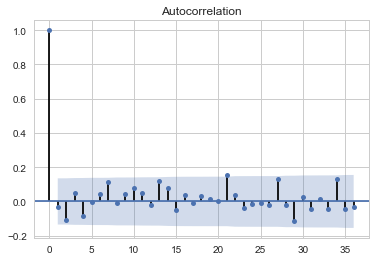

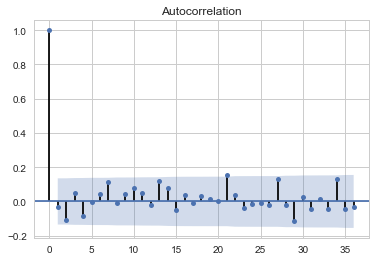

In [29]:
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals,lags=36)

This model is better than the first one, because the correlogram of this model does not have any autocorrelations except at lag 21 which can be ignored because it is far



Moreover, the AIC is lower in the second model

# 9.20

In [30]:
df['lag1_homes'] = df['homes'].shift(1)
df['lag2_homes'] = df['homes'].shift(2)
df['lag5_dhomes'] = df['dhomes'].shift(5)
df['lag1_dirate'] = df['dirate'].shift(1)
df['lag3_dirate'] = df['dirate'].shift(3)
df.dropna(inplace=True)

In [31]:
df.tail(6)

,homes,irate,dhomes,dirate,lag1_dhomes,lag1_dirate,lag2_dirate,lag5_dhomes,lag3_dirate,lag1_homes,lag2_homes
Date,,,,,,,,,,,
2009-10,400,4.95,9.0,-0.11,-17.0,-0.13,-0.03,26.0,-0.20,391.0,408.0
2009-11,362,4.88,-38.0,-0.07,9.0,-0.11,-0.13,28.0,-0.03,400.0,391.0
2009-12,353,4.93,-9.0,0.05,-38.0,-0.07,-0.11,20.0,-0.13,362.0,400.0
2010-01,338,5.03,-15.0,0.10,-9.0,0.05,-0.07,-11.0,-0.11,353.0,362.0
2010-02,324,4.99,-14.0,-0.04,-15.0,0.10,0.05,-17.0,-0.07,338.0,353.0
2010-03,411,4.97,87.0,-0.02,-14.0,-0.04,0.10,9.0,0.05,324.0,338.0


In [32]:
X1_multi=df.drop(['homes','irate','dhomes','dirate','lag2_dirate',"lag1_dhomes"], axis=1)
Y1_target=df.homes
X1_multi=sm.tools.tools.add_constant(X1_multi, prepend=True, has_constant='skip')

In [33]:
mod1 = sm.OLS(Y1_target, X1_multi)
res = mod1.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  homes   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1009.
Date:                Mon, 16 Apr 2018   Prob (F-statistic):          9.53e-140
Time:                        20:44:44   Log-Likelihood:                -1087.0
No. Observations:                 206   AIC:                             2186.
Df Residuals:                     200   BIC:                             2206.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1809     12.452      0.015      

b)

In [34]:
#predictions for the following months
#homes(April)=0.1809 + 0.69*411+0.304*324+0.21*(-38)-64.24*(-0.02)-47.1*0.1=370.8
#homes(May)=0.1809+0.69*370.8+0.304*411+0.21*(-9)-64.24*0-47.1*(-0.04)=380.4
#homes(June)=0.1809+0.69*380.4+0.304*370.8+0.21*(-15)-64.24*0-47.1*(-0.02)=372.9


c)

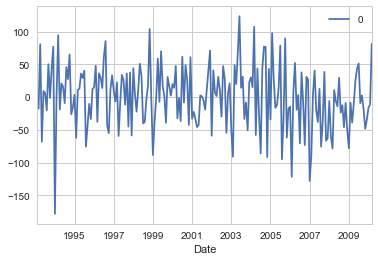

                  0
count  2.060000e+02
mean   1.664132e-11
std    4.746540e+01
min   -1.786248e+02
25%   -3.304559e+01
50%    2.130585e+00
75%    3.107092e+01
max    1.237722e+02


In [35]:
#residuals
residuals = DataFrame(res.resid)
residuals.plot()
plt.show()
print(residuals.describe())